In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Patient 1 session 1 Non_FoG vs. FoG

In [41]:
df1_path = 'Results/p1v1/df_p1v1_FoG.csv'
df2_path = 'Results/p1v1/df_p1v1_nonFoG.csv'

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)


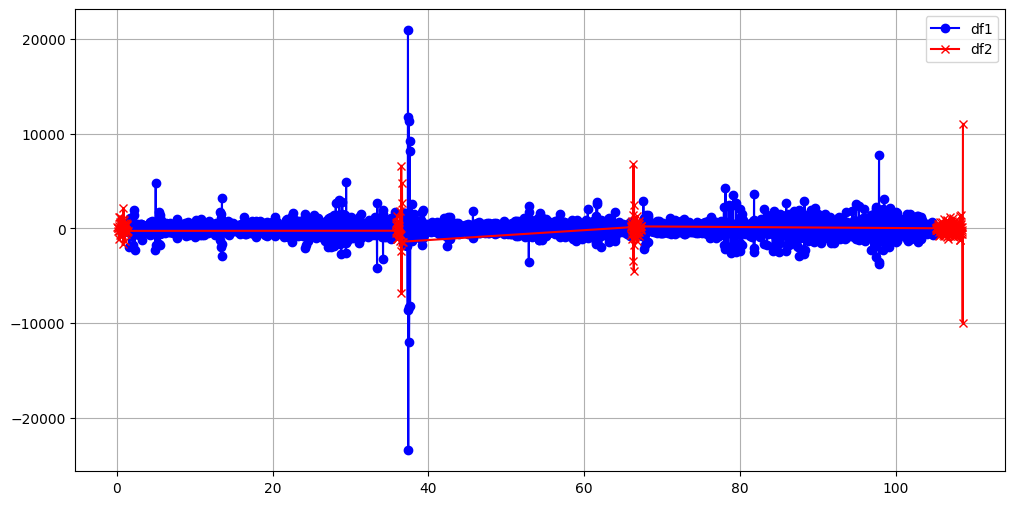

In [42]:
# Graph Analysis of Fog vs Non_fog

x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df1[x_axis], df1[y_axis], label = 'df1', color = 'blue', marker = 'o')
plt.plot(df2[x_axis], df2[y_axis], label = 'df2', color = 'red', marker = 'x')

plt.legend()
plt.grid(True)
plt.show()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3039 non-null   float64
 1   frame_time           3039 non-null   float64
 2   index                3039 non-null   int64  
 3   right_ankle_x        3039 non-null   float64
 4   right_ankle_y        3039 non-null   float64
 5   right_knee_x         3039 non-null   float64
 6   right_knee_y         3039 non-null   float64
 7   right_hip_x          3039 non-null   float64
 8   right_hip_y          3039 non-null   float64
 9   magnitude1           3039 non-null   float64
 10  magnitude2           3039 non-null   float64
 11  angle_deg            3039 non-null   float64
 12  angular_velocity     3039 non-null   float64
 13  linear_acceleration  3039 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 332.5 KB


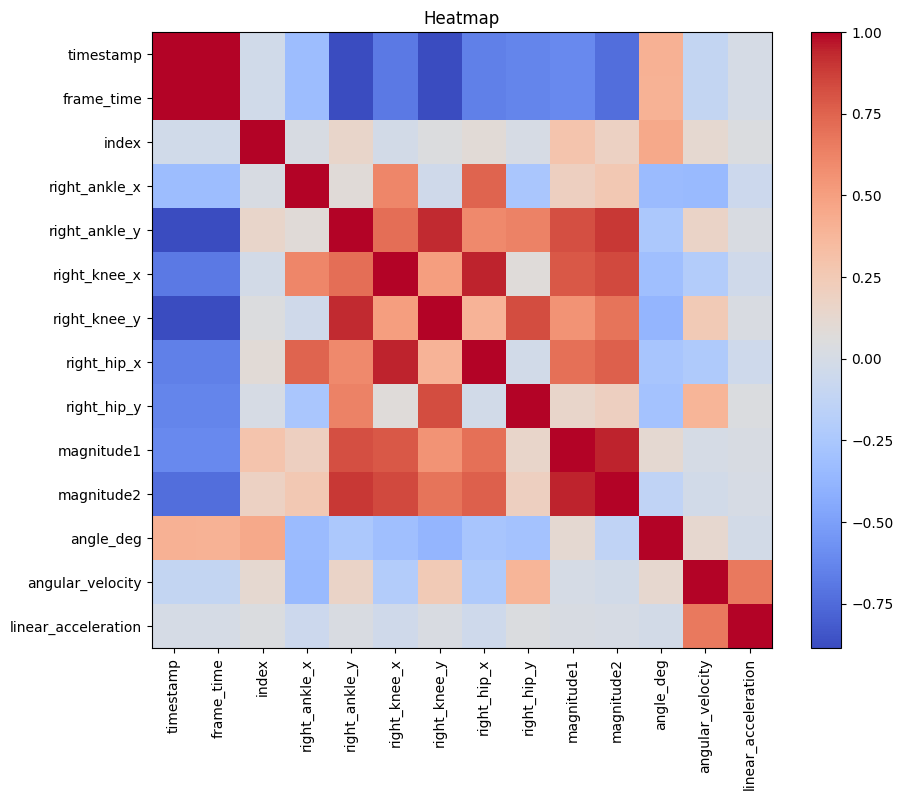

In [24]:
# Heatmap analysis
# Drop columns that have string or object
#column_index = [0,16,13]
#df2 = df2.drop(df2.columns[column_index], axis = 1)

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Plotting the heatmap
plt.figure(figsize = (10,8))
plt.imshow(correlation_matrix, cmap = 'coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Heatmap')
plt.show()

### Patient Data vs. Patient Data

In [43]:
df_p1v1 = pd.read_csv('Results/p1v1/p1v1_results.csv')
df_p1v2 = pd.read_csv('Results/p1v2/p1v2_results.csv')

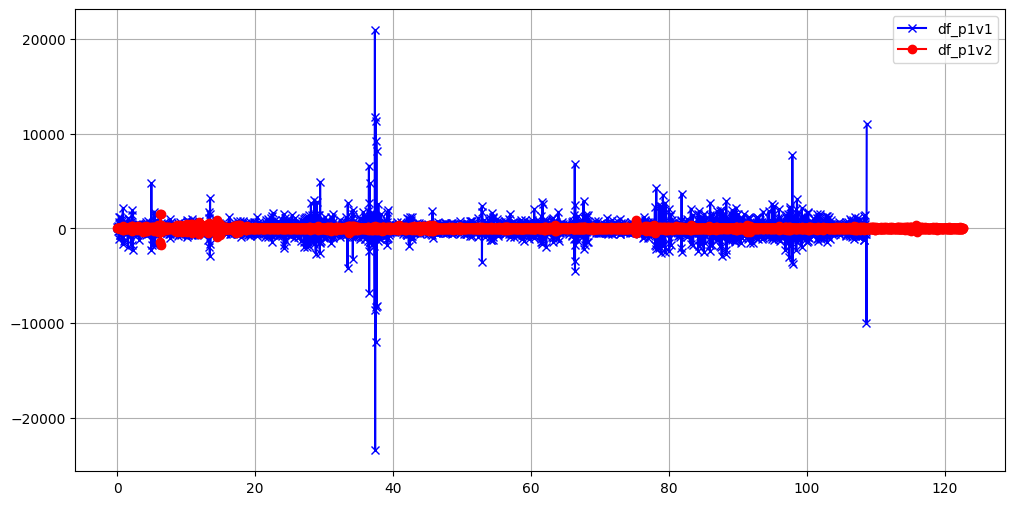

In [44]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_p1v1[x_axis], df_p1v1[y_axis], label = 'df_p1v1', color = 'blue', marker = 'x')
plt.plot(df_p1v2[x_axis], df_p1v2[y_axis], label = 'df_p1v2', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

### Normal People Data np1_1 vs np1_2

In [28]:
df_np1v1 = pd.read_csv('Results/np1v1_results.csv')
df_np1v2 = pd.read_csv('Results/np1v2_results.csv')

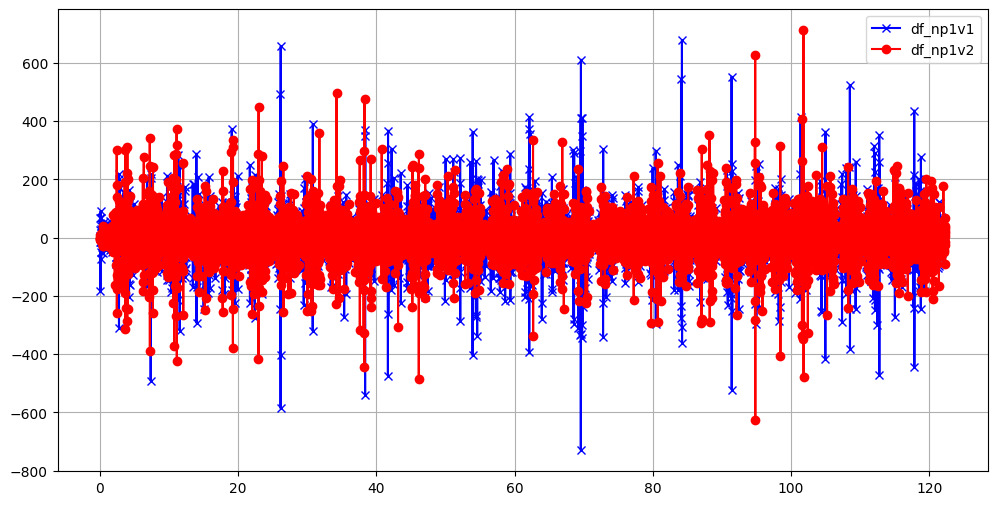

In [29]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_np1v1[x_axis], df_np1v1[y_axis], label = 'df_np1v1', color = 'blue', marker = 'x')
plt.plot(df_np1v2[x_axis], df_np1v2[y_axis], label = 'df_np1v2', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

### Normal Data vs. Patient Data 

In [45]:
df_p1v2 = pd.read_csv('Results/p1v2/p1v2_results.csv') #patient
df_np1v2 = pd.read_csv('Results/np1v2_results.csv') #normal

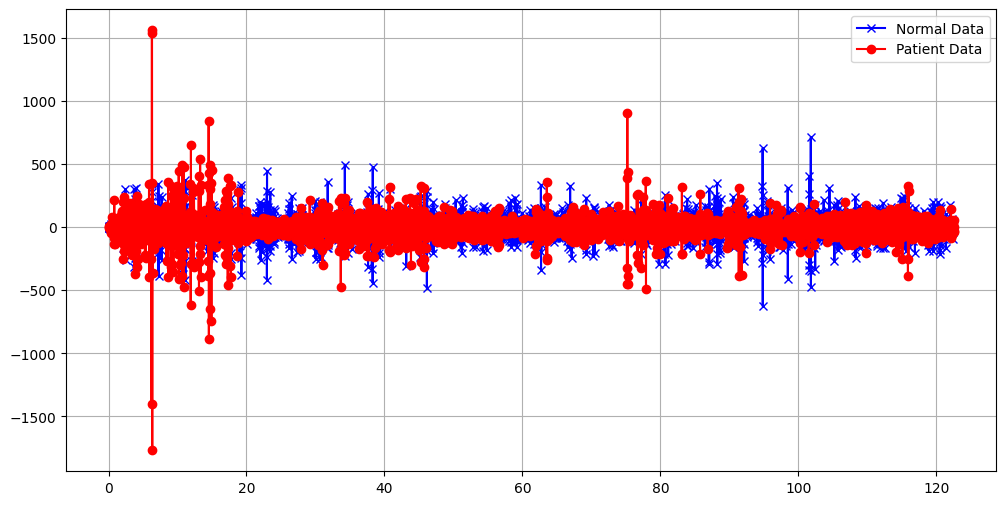

In [46]:
x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df_np1v2[x_axis], df_np1v2[y_axis], label = 'Normal Data', color = 'blue', marker = 'x')
plt.plot(df_p1v2[x_axis], df_p1v2[y_axis], label = 'Patient Data', color = 'red', marker = 'o')

plt.legend()
plt.grid(True)
plt.show()

# overshadowing 

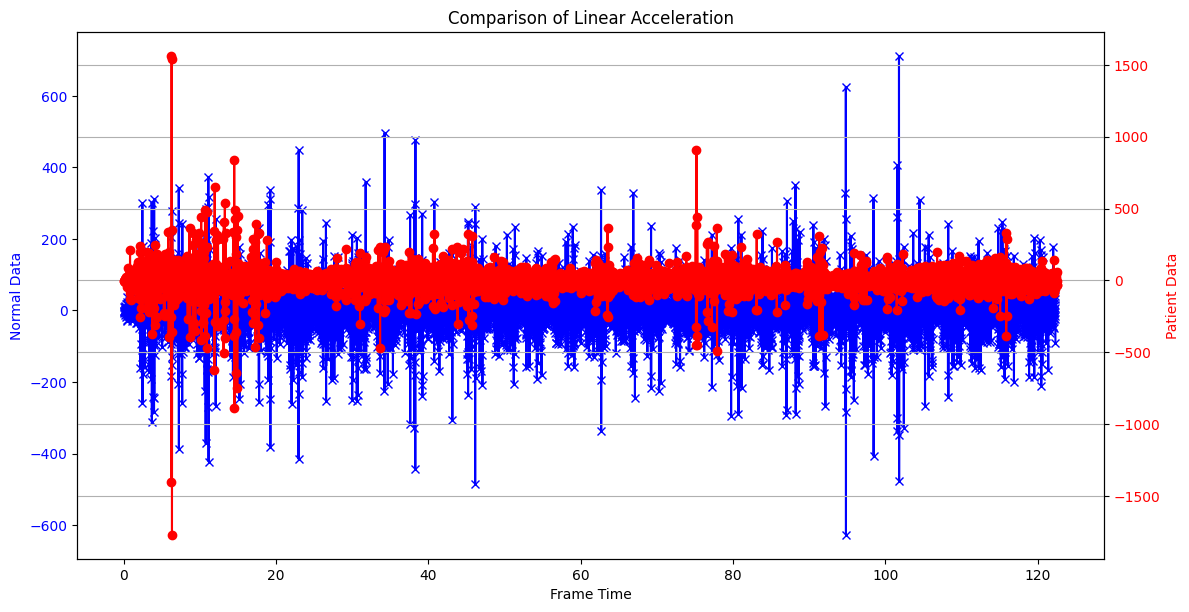

In [47]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Frame Time')
ax1.set_ylabel('Normal Data', color='blue')
ax1.plot(df_np1v2[x_axis], df_np1v2[y_axis], color='blue', marker='x', label='Normal Data')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Patient Data', color='red')
ax2.plot(df_p1v2[x_axis], df_p1v2[y_axis], color='red', marker='o', label='Patient Data')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Comparison of Linear Acceleration')
plt.grid(True)
plt.show()


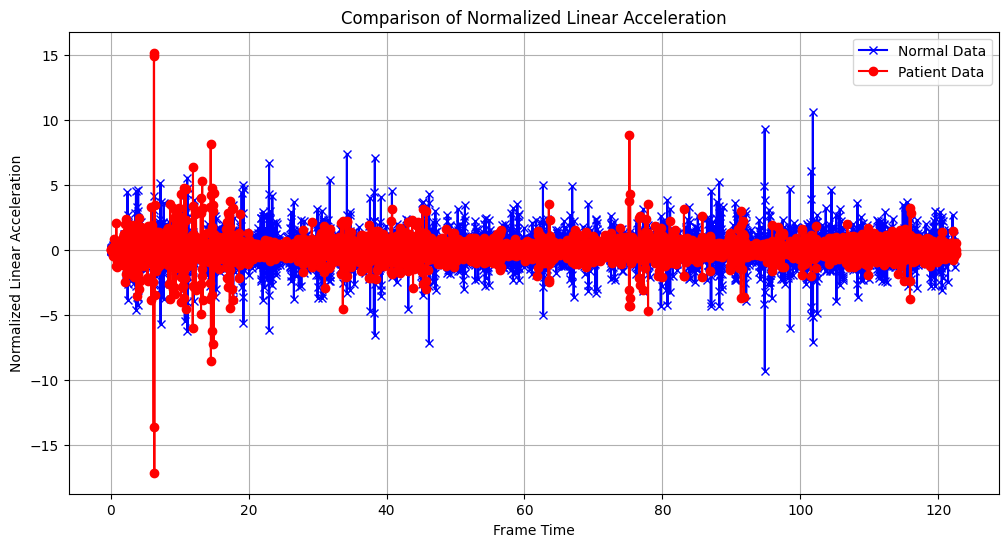

In [48]:
# Normalize the linear acceleration column for both datasets
df_p1v2['linear_acceleration_normalized'] = (df_p1v2[y_axis] - df_p1v2[y_axis].mean()) / df_p1v2[y_axis].std()
df_np1v2['linear_acceleration_normalized'] = (df_np1v2[y_axis] - df_np1v2[y_axis].mean()) / df_np1v2[y_axis].std()

plt.figure(figsize=(12,6))

plt.plot(df_np1v2[x_axis], df_np1v2['linear_acceleration_normalized'], label='Normal Data', color='blue', marker='x')
plt.plot(df_p1v2[x_axis], df_p1v2['linear_acceleration_normalized'], label='Patient Data', color='red', marker='o')

plt.xlabel('Frame Time')
plt.ylabel('Normalized Linear Acceleration')
plt.title('Comparison of Normalized Linear Acceleration')
plt.legend()
plt.grid(True)
plt.show()


## Algorithm finding difference

### Basic Statistical Measures

In [50]:

patient_stats = df_p1v2['linear_acceleration'].describe()
print("Patient Data Statistics:")
print(patient_stats)

normal_stats = df_np1v2['linear_acceleration'].describe()
print("Normal Data Statistics:")
print(normal_stats)

Patient Data Statistics:
count    3673.000000
mean        0.005883
std       103.086550
min     -1768.904948
25%       -29.883881
50%        -0.008015
75%        31.233710
max      1561.420003
Name: linear_acceleration, dtype: float64
Normal Data Statistics:
count    7342.000000
mean        0.013047
std        67.376712
min      -627.053821
25%       -28.924871
50%        -0.541511
75%        27.514374
max       711.472604
Name: linear_acceleration, dtype: float64
